# ODE Project

### <ins>Authors:</ins> KHOUTAIBI Iliass, BARAKA Rayane, LAITA Sami, MOTIER Benjamin, MAGROUNE Ghanem

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import time
from carbone import *

Before Starting, The Function <strong>derivative</strong> of Carbon.py file has been modified, to return in addition to: 
$$
        \text{dAtmosphere\_dt},\\
        \text{dCarbonateRock\_dt},\\  
        \text{dDeepOcean\_dt},\\
        \text{dFossilFuelCarbon\_dt},\\
        \text{dPlants\_dt},\\
        \text{dSoils\_dt},\\
        \text{dSurfaceOcean\_dt},\\
        \text{dVegLandArea\_percent\_dt},
        $$

The two variables: $$
        \text{Kcarb\_},\\
        \text{SurfCConc\_}$$

This was a decision made in order to prove the consistency and the stability of our methods. More information in the Report of the projects.

The function down below, under the name $\text{euler\_Matrix}$, implements the Euler Method on a Vector.

In [14]:
def euler_Matrix(f, y_0 : list, step:float, t_0: float, T:float):
    """Python Implementation for higher dimension Matrix"""
    
    start = time.time()
    number_steps = np.arange(t_0, t_0 + T + step, step)
    y = np.zeros((len(number_steps), len(y_0) + 2))
    y[0,:-2] = y_0  
    dt = step
    

    for j in range(len(number_steps) - 1):
        func = f(y[j, :], number_steps[j])
        y[j+1,:-2] = y[j, :-2] + dt * func[:-2]
        y[j+1,-2:] = func[-2:]  
         

    end = time.time()
    print(f"Execution time of Euler method is: {end-start}")
    return number_steps , y

Let us plot the evolution of our variables, for a time span of $750$ years, just like the simulation to be compared to.

Execution time of Euler method is: 0.07253861427307129


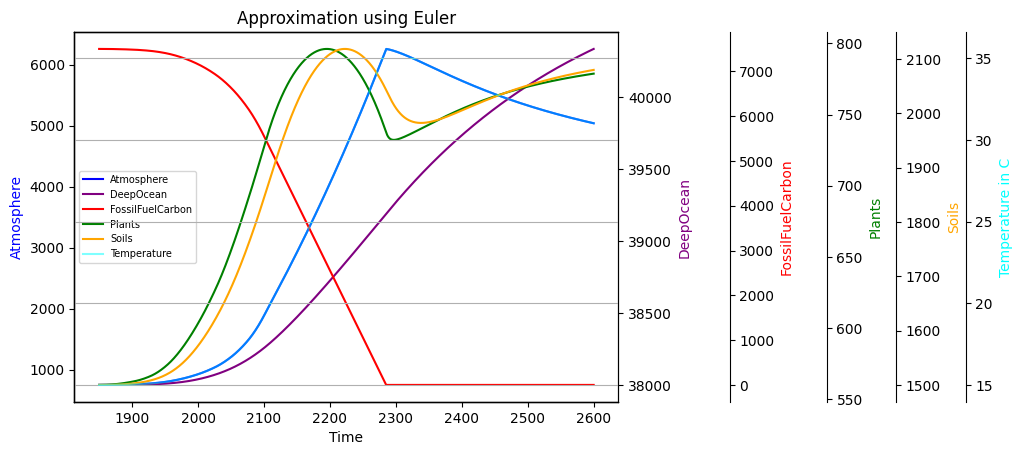

In [15]:
fig, ax = plt.subplots()

twin1 = ax.twinx()
twin2 = ax.twinx()
twin3 = ax.twinx()
twin4 = ax.twinx()
twin5 = ax.twinx()

# TO CHANGE

twin2.spines["right"].set_position(("outward", 80))
twin3.spines["right"].set_position(("outward", 150))
twin4.spines["right"].set_position(("outward", 200))
twin5.spines["right"].set_position(("outward", 250))


number_steps, y = euler_Matrix(f=derivative, y_0=x0, step=0.1, t_0=1850.0, T=750)
Temp = GlobalTemp(AtmCO2(y[:, 0])) # Temperature using Atmoshphere


p0, = ax.plot(number_steps, y[:, 0], color="blue", label="Atmosphere")
p1, = twin1.plot(number_steps, y[:, 2], color="purple", label="DeepOcean")
p2, = twin2.plot(number_steps, y[:, 3], color="red", label="FossilFuelCarbon")
p3, = twin3.plot(number_steps, y[:, 4], color="green", label="Plants")
p4, = twin4.plot(number_steps, y[:, 5], color="orange", label="Soils")
p5, = twin5.plot(number_steps, Temp, color='cyan', label="Temperature", alpha = 0.5)

ax.set_xlabel("Time")
ax.set_ylabel("Atmosphere", color="blue")
twin1.set_ylabel("DeepOcean", color="purple")
twin2.set_ylabel("FossilFuelCarbon", color="red")
twin3.set_ylabel("Plants", color="green")
twin4.set_ylabel("Soils", color="orange")
twin5.set_ylabel("Temperature in C", color="cyan")

lines = [p0, p1, p2, p3, p4, p5]
ax.legend(lines, [l.get_label() for l in lines], fontsize='7',loc="center left")


# plot and move left
plt.title('Approximation using Euler')
plt.subplots_adjust(left=0.05)
plt.grid()
plt.show()

The function down below under the name $\text{runge\_kutte\_Matrix}$ implements the Runge-Kutta method for a Vector.

In [16]:
def runge_kutta_Matrix(f, y_0, step, t_0, T):
    """Implementing the runga Kutta Method MatrixWise"""
    
    start = time.time()
    number_steps = np.arange(t_0, t_0 + T + step, step)
    y = np.zeros((len(number_steps), len(y_0) + 2))
    y[0,: -2] = y_0
    dt = step

    for j in range(len(number_steps) - 1):

        p_n_1 = f(y[j,:],number_steps[j])
        t_n_2 = number_steps[j] + 1/2 * dt
        y_n_2 = y[j,:] + 1/2 * dt * p_n_1
        p_n_2 = f(y_n_2,t_n_2)

        t_n_3 = t_n_2
        y_n_3 = y[j,:] + 1/2 * dt * p_n_2
        p_n_3 = f(y_n_3,t_n_3)

        t_n_4 = number_steps[j] + dt
        y_n_4 = y[j,:] + dt * p_n_3
        p_n_4 = f(y_n_4,t_n_4)
        
        y[j+1,:] = y[j,:] + dt * (1/6 * p_n_1 + 2/6 * p_n_2 + 2/6 * p_n_3 + 1/6 * p_n_4)
    
    end = time.time()
    print(f"Execution time of Runge-Kutta method is: {end-start}")
    return  number_steps, y

Let us plot the results using the Runge-Kutta Method, for a time span of $750$ years, just like the simulation to be compared to.

Execution time of Runge-Kutta method is: 0.31675171852111816


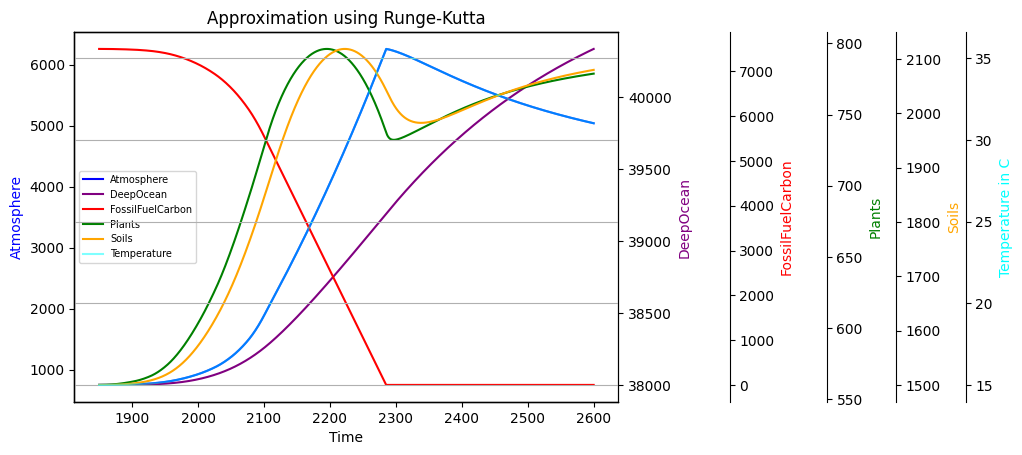

In [17]:
fig, ax = plt.subplots()

x0 = np.array([Atmosphere_Initial,
               CarbonateRock_Initial,
               DeepOcean_Initial,
               FossilFuel_Initial,
               Plant_Initial,
               Soil_Initial,
               SurfaceOcean_Initial,
               VegLandArea_percent_Initial
               ])

twin1 = ax.twinx()
twin2 = ax.twinx()
twin3 = ax.twinx()
twin4 = ax.twinx()
twin5 = ax.twinx()

# TO CHANGE

twin2.spines["right"].set_position(("outward", 80))
twin3.spines["right"].set_position(("outward", 150))
twin4.spines["right"].set_position(("outward", 200))
twin5.spines["right"].set_position(("outward", 250))

number_steps, y = runge_kutta_Matrix(f=derivative, y_0=x0, step=0.1, t_0=1850.0, T=750)
Temp = GlobalTemp(AtmCO2(y[:, 0])) # Temperature using Atmoshphere


p0, = ax.plot(number_steps, y[:, 0], color="blue", label="Atmosphere")
p1, = twin1.plot(number_steps, y[:, 2], color="purple", label="DeepOcean")
p2, = twin2.plot(number_steps, y[:, 3], color="red", label="FossilFuelCarbon")
p3, = twin3.plot(number_steps, y[:, 4], color="green", label="Plants")
p4, = twin4.plot(number_steps, y[:, 5], color="orange", label="Soils")
p5, = twin5.plot(number_steps, Temp, color='cyan', label="Temperature", alpha = 0.5)


ax.set_xlabel("Time")
plt.title('Approximation using Runge-Kutta')
ax.set_ylabel("Atmosphere", color="blue")
twin1.set_ylabel("DeepOcean", color="purple")
twin2.set_ylabel("FossilFuelCarbon", color="red")
twin3.set_ylabel("Plants", color="green")
twin4.set_ylabel("Soils", color="orange")
twin5.set_ylabel("Temperature in C", color = "cyan")

lines = [p0, p1, p2, p3, p4, p5]
ax.legend(lines, [l.get_label() for l in lines], fontsize='7',loc="center left")


# plot and move left
plt.subplots_adjust(left=0.05)
plt.grid()
plt.show()


The following section, demonstrates empirically the positivity of the polynomial:

$$P(\text{SurfCConc}, \text{Kcarb}) = \text{SurfCConc}^2 - \text{Alk} \cdot (2 \cdot \text{SurfCConc} - \text{Alk}) \cdot (1 - 4 \cdot \text{Kcarb})$$

For various Initial Values of $\text{Atmosphere\_Initial}$.

Execution time of Euler method is: 0.07190847396850586
Execution time of Euler method is: 0.0630645751953125
Execution time of Euler method is: 0.06534314155578613
Execution time of Euler method is: 0.06263589859008789
Execution time of Euler method is: 0.07410526275634766
Execution time of Euler method is: 0.0606236457824707
Execution time of Euler method is: 0.05918717384338379
Execution time of Euler method is: 0.06235074996948242
Execution time of Euler method is: 0.07300305366516113
Execution time of Euler method is: 0.06224632263183594
Execution time of Euler method is: 0.06223940849304199
Execution time of Euler method is: 0.05907392501831055
Execution time of Euler method is: 0.06987261772155762
Execution time of Euler method is: 0.059834957122802734
Execution time of Euler method is: 0.05824136734008789
Execution time of Euler method is: 0.06397581100463867
Execution time of Euler method is: 0.08881688117980957
Execution time of Euler method is: 0.06261754035949707
Execution t

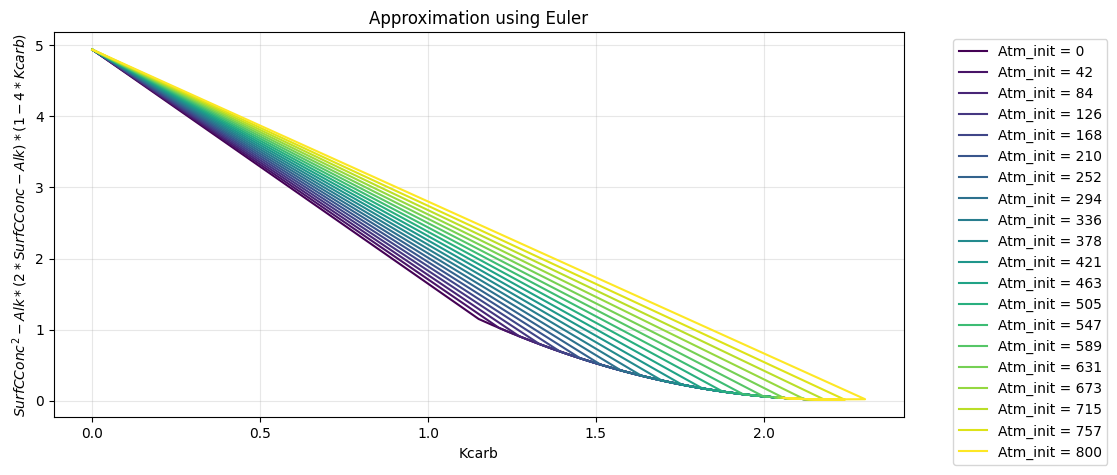

In [18]:
fig, ax = plt.subplots(figsize=(10,5))


Atmosphere_Initial = 750
CarbonateRock_Initial = 100000000   
DeepOcean_Initial = 38000
FossilFuel_Initial = 7500
Plant_Initial = 560
Soil_Initial = 1500
SurfaceOcean_Initial = 890
VegLandArea_percent_Initial = 100

atm = np.linspace(0,800,20)
surfo = np.linspace(500,1000,20)

x0 = np.array([ [a, CarbonateRock_Initial, DeepOcean_Initial, FossilFuel_Initial, Plant_Initial, Soil_Initial, s, VegLandArea_percent_Initial] for (s,a) in zip(surfo,atm)])
colors = plt.cm.viridis(np.linspace(0, 1, len(x0)))
polynomial = lambda x,y : pow(x,2) - Alk*(2*x - Alk)*(1-4*y)

for i in range(len(x0)):
    number_steps, y = euler_Matrix(f=derivative, y_0=x0[i], step=0.1, t_0=1850.0, T=750)
    ax.plot(y[:,-1], polynomial(y[:,-1],y[:,-2]), label=f"Atm_init = {int(atm[i])}", color=colors[i])



# plot and move left
plt.title('Approximation using Euler')
plt.subplots_adjust(left=0.05)
plt.xlabel(r"Kcarb")
plt.ylabel(r"$SurfCConc^2 - Alk*(2*SurfCConc - Alk)*(1-4*Kcarb)$")
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))
plt.grid(alpha=0.3)
plt.show()

The section down below, proves empirically the positivity of the variable $\text{CO3}$, present in the denominator of the term:

$$\text{pCO2Oc} = 280 \cdot \text{KCO2} \cdot \frac{\text{HCO3}^2}{\text{CO3}}$$

Execution time of Euler method is: 0.08829593658447266
Execution time of Euler method is: 0.08437538146972656
Execution time of Euler method is: 0.08722853660583496
Execution time of Euler method is: 0.10019063949584961
Execution time of Euler method is: 0.06212306022644043
Execution time of Euler method is: 0.0614628791809082
Execution time of Euler method is: 0.06008410453796387
Execution time of Euler method is: 0.06382369995117188
Execution time of Euler method is: 0.06127357482910156
Execution time of Euler method is: 0.0599977970123291
Execution time of Euler method is: 0.06408238410949707
Execution time of Euler method is: 0.06783843040466309
Execution time of Euler method is: 0.0594179630279541
Execution time of Euler method is: 0.06042838096618652
Execution time of Euler method is: 0.05863642692565918
Execution time of Euler method is: 0.06586122512817383
Execution time of Euler method is: 0.058722734451293945
Execution time of Euler method is: 0.057511091232299805
Execution t

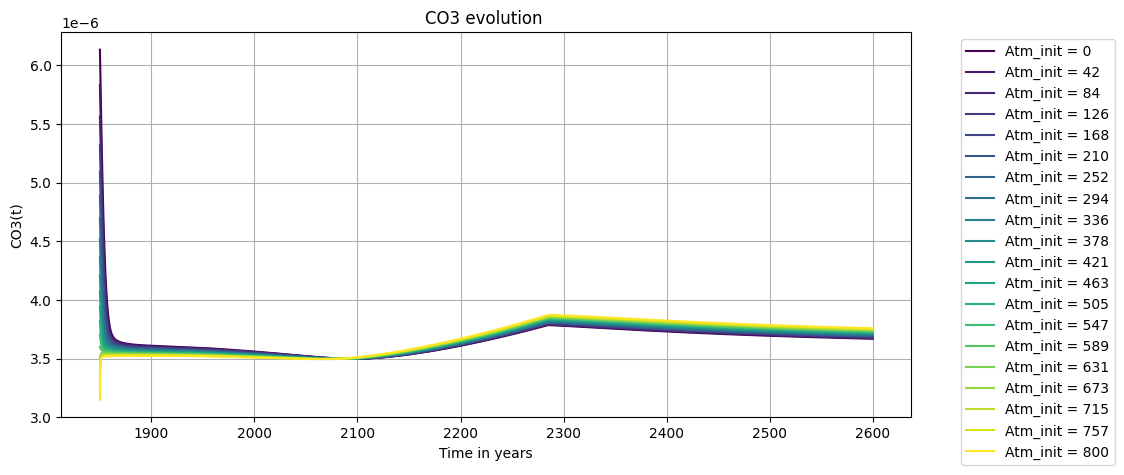

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
Atmosphere_Initial = 750
CarbonateRock_Initial = 100000000   
DeepOcean_Initial = 38000
FossilFuel_Initial = 7500
Plant_Initial = 560
Soil_Initial = 1500
SurfaceOcean_Initial = 890
VegLandArea_percent_Initial = 100

atm = np.linspace(0,800,20)
surfo = np.linspace(500,1000,20)

x0 = [ [a, CarbonateRock_Initial, DeepOcean_Initial, FossilFuel_Initial, Plant_Initial, Soil_Initial, s, VegLandArea_percent_Initial] for (s,a) in zip(surfo,atm)]
polynomial = lambda x,y : pow(x,2) - Alk*(2*x - Alk)*(1-4*y)
colors = plt.cm.viridis(np.linspace(0, 1, len(x0)))

for i in range(len(x0)):
    number_steps, y = euler_Matrix(f=derivative, y_0=x0[i], step=0.1, t_0=1850.0, T=750)
    inter_C03 = CO3(HCO3(Kcarb(WaterTemp(GlobalTemp(AtmCO2(y[:,0])))),y[:,-4]))
    ax.plot(np.arange(1850, 1850 + 750 + 0.1, 0.1), inter_C03, color=colors[i], label=f"Atm_init = {int(atm[i])}")


# plot and move left
plt.title('CO3 evolution ')
plt.xlabel("Time in years")
plt.ylabel("CO3(t)")
plt.subplots_adjust(left=0.05)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid()
plt.show()